#**David Garcia EDA Project**

##Netflix Movies and TV Shows

The dataset for this project contains a list of all movies and TV shows that are available on Netflix. This project helps understand Netflix's key markets as well as gives a broad overview of what content exactly is on the streaming platform. The data includes multiple variables including Type(Movie or TV show), Title, Director, Cast, Country, Date Added, Release Year, Rating, Listed In(Genres it falls under), and Description. In this analysis there are several topics that can be analyzed and explored, finding connections between these varaibles. When analyzing the data, I determined that it would be helpful to create a new variable named Audience that names the intended audience age group for content based on its rating. I also deleted the variable Show ID because it had no use for my analysis. After creating this new variable and deleting the other, I was ready to begin visualizing the data. 

Questions that come to mind:
*   Are there more movies or TV Shows on Netflix?
*   What countries are producing the most content?
*   What audience is most of the content on Netflix appealing too?
*   What directors are creating the most content on Netflix?
*   What actors are the most popular on Netflix?
*   How many minutes long are most movies on Netflix?
*   What are the most popular genres on Netflix?





In [ ]:
# Reading and storing the data
from google.colab import drive
drive.mount("/content/gdrive")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/gdrive/My Drive/netflix_titles.csv')

# Removing "Show_ID" variable
df = df.drop(columns='show_id')
print(df)

Mounted at /content/gdrive
         type  ...                                        description
0     TV Show  ...  In a future where the elite inhabit an island ...
1       Movie  ...  After a devastating earthquake hits Mexico Cit...
2       Movie  ...  When an army recruit is found dead, his fellow...
3       Movie  ...  In a postapocalyptic world, rag-doll robots hi...
4       Movie  ...  A brilliant group of students become card-coun...
...       ...  ...                                                ...
7782    Movie  ...  When Lebanon's Civil War deprives Zozo of his ...
7783    Movie  ...  A scrappy but poor boy worms his way into a ty...
7784    Movie  ...  In this documentary, South African rapper Nast...
7785  TV Show  ...  Dessert wizard Adriano Zumbo looks for the nex...
7786    Movie  ...  This documentary delves into the mystique behi...

[7787 rows x 12 columns]


Text(0.5, 1.0, 'Movies vs TV Shows')

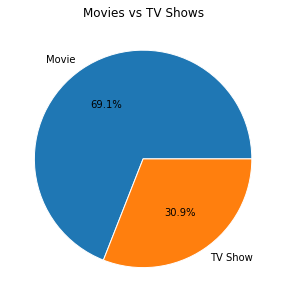

In [ ]:
# Counting the number of Movies and TV Shows
movie_vs_tv_count = df['type'].value_counts()

# Creating a Pie Chart
plt.figure(figsize=(5,5))
plt.pie(movie_vs_tv_count.values, labels= movie_vs_tv_count.index,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})
plt.title('Movies vs TV Shows')

This pie chart visualizes the distribution of movies to TV shows that are available on Netflix. It is clear that movies are significantly more common than TV shows on the Platform. 

Text(0.5, 0, 'Countries')

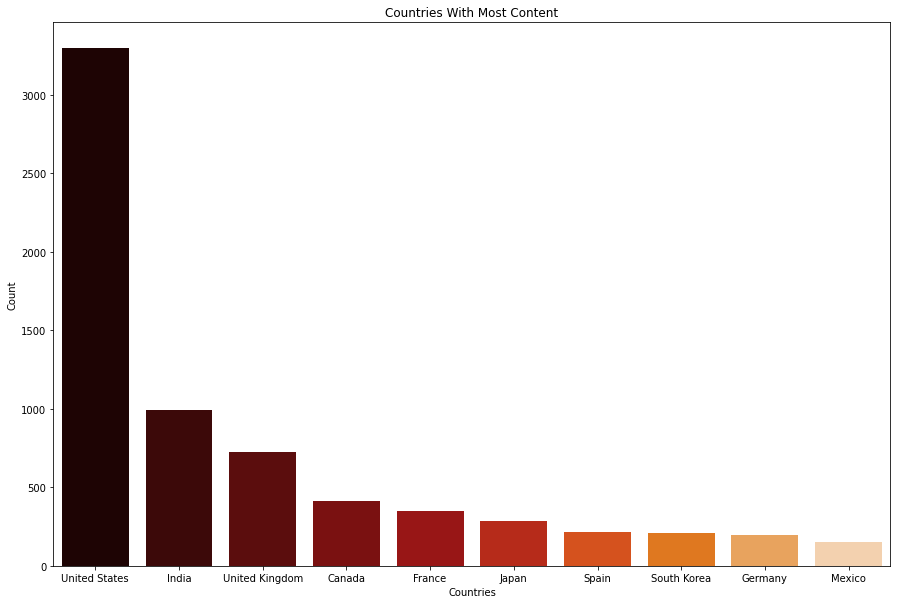

In [ ]:
# Countries with the most content
# Many shows and movies have more than one country that are separated by a comma, but both of them still have to be counted
track = {}
# Stripping the commas and then adding each individual country to the track variable
def country_count(country_str):
  countries = country_str.split(', ')    
  for country in countries:
    if country in track:
      track[country] += 1
    else: 
      track[country] = 1
# Track now has all the countries and the number of times they appear stored. 
df.loc[df['country'].notnull(), 'country'].apply(country_count)

# Creating new table to use for chart data
country_c = pd.DataFrame(data=track.values(), index=track.keys(), columns=['Count']).reset_index()
# Putting it in descending order and extracting the top 10 values
top_countries = country_c.sort_values('Count', ascending=False).head(10)

# Graph
plt.figure(figsize=(15,10))
sns.barplot(x='index', y='Count', data=top_countries, palette='gist_heat')
plt.title('Countries With Most Content')
plt.xlabel('Countries')


This bar chart shows the top 10 countries that have the most content on Netflix. The United States dominates all other countries in terms of content. From this chart it can be deduced that the United States makes up most of Netflix's market. 

Text(0.5, 0, 'Audience')

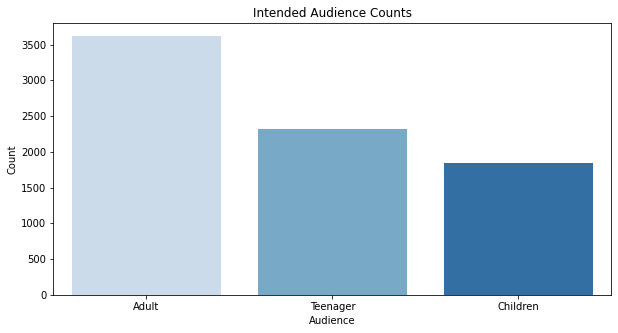

In [ ]:
# Counting the amount of content for  the different audience types
audience_count = df.loc[df['audience'].notnull(), 'audience'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=audience_count.index, y=audience_count.values, palette='Blues')
plt.title('Intended Audience Counts')
plt.ylabel('Count')
plt.xlabel('Audience')

This chart shows the different audience types and the respective amount of content on Netflix that falls under each category. Netflix is mainly trying to appeal to Adults with the content it has available to consumers. It is notable to mention that there is not too large of a difference between the amount of content available for Teenagers and Children. 

Text(0, 0.5, 'Directors')

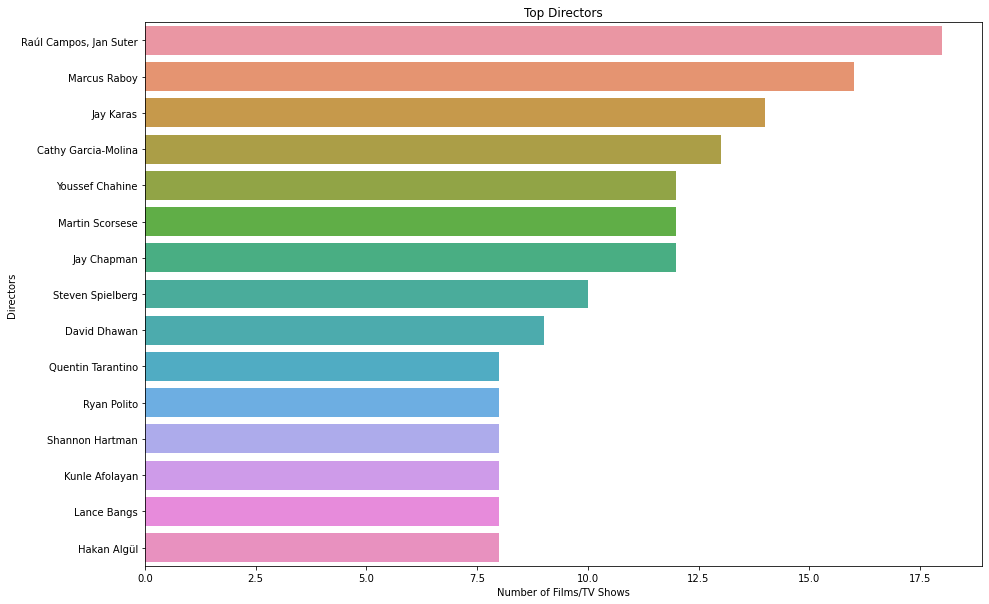

In [ ]:
# Directors that create the most content
director_count = df.loc[df['director'].notnull(), 'director'].value_counts().head(15)
plt.figure(figsize=(15,10))
sns.barplot(y=director_count.index, x=director_count.values)
plt.title('Top Directors')
plt.xlabel('Number of Films/TV Shows')
plt.ylabel("Directors")

This chart shows the 15 directors that have the most content on Netflix. The top 5 directors have significantly more content, however, after that the differences in content begin to get very minimal. 

Text(0, 0.5, 'Actor')

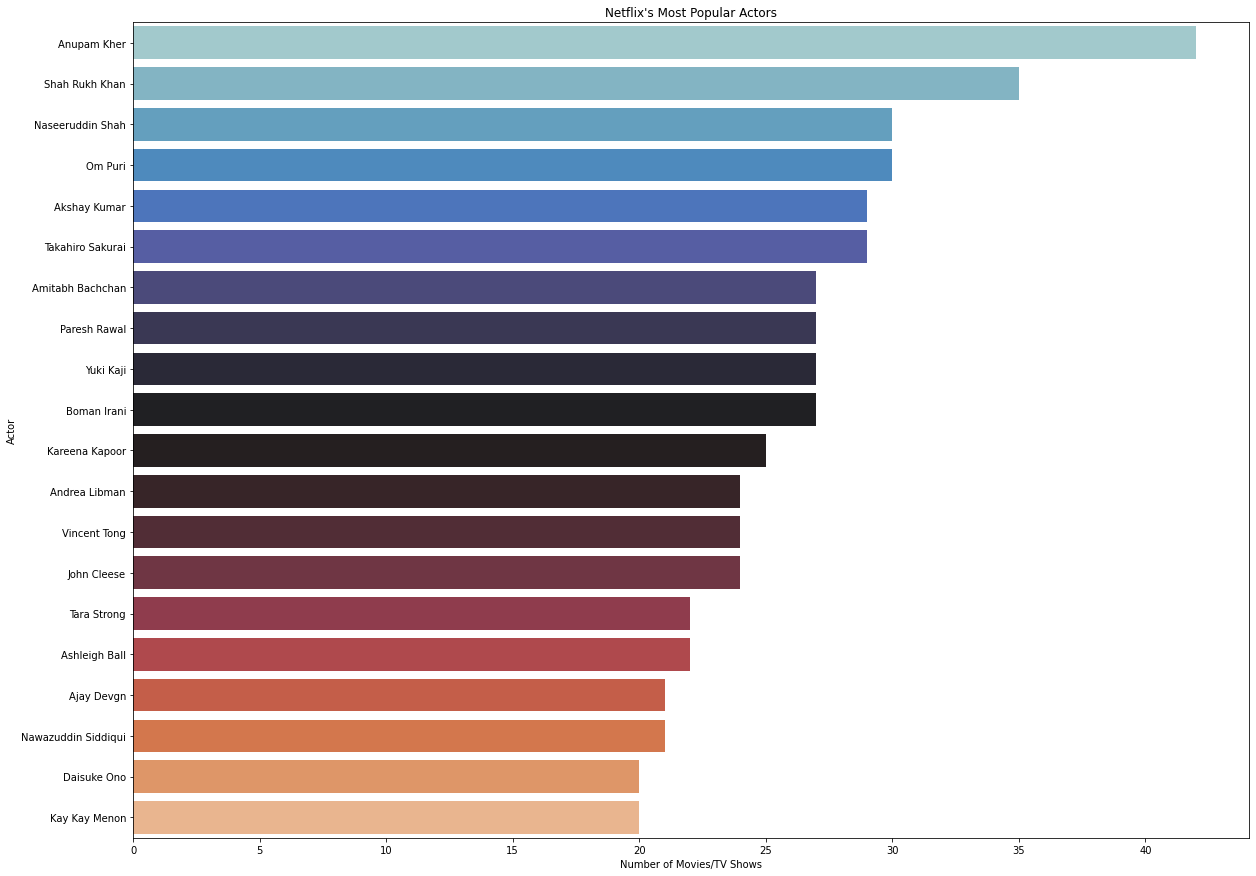

In [ ]:
# Most popular actors
track1 = {}

def cast_count(cast_str):
  actors = cast_str.split(', ')
  for cast in actors:
    if cast in track1:
      track1[cast] += 1
    else:
      track1[cast] = 1

df.loc[df['cast'].notnull(), 'cast'].apply(cast_count)

cast_c = pd.DataFrame(data=track1.values(), index=track1.keys(), columns=['Count']).reset_index()
top_actors = cast_c.sort_values('Count', ascending=False).head(20)

plt.figure(figsize=(20,15))
sns.barplot(x='Count', y='index', data = top_actors, palette='icefire')
plt.title("Netflix's Most Popular Actors")
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel("Actor")


This chart displays the 20 actors on Netflix that are featured in the most movies and TV shows. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Distribution of Movie Length')

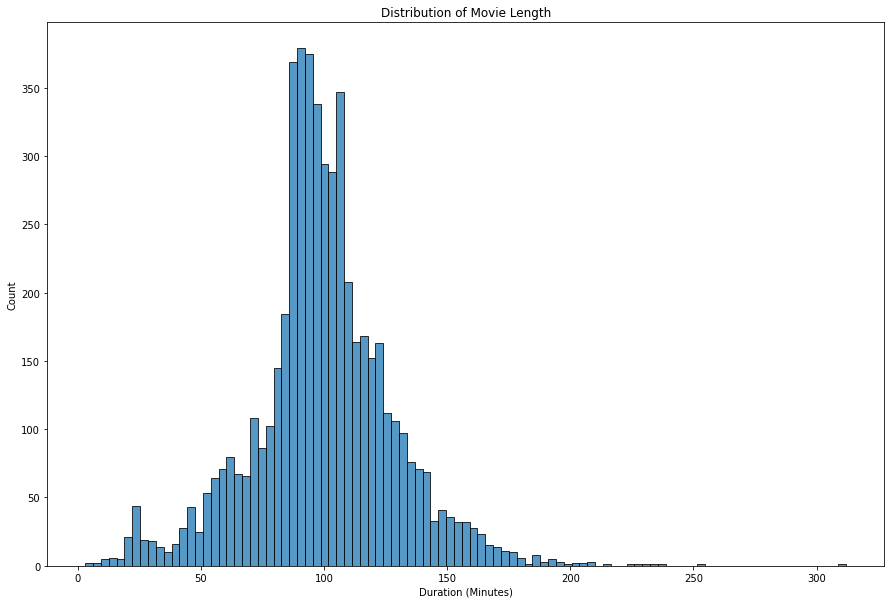

In [ ]:
# Length of movie distribution
# Eliminating TV Shows and just focusing on movies
movie = df.loc[df['type'] == 'Movie']
# Removing "min" from duration and turning it into a integer
movie['duration'] = pd.to_numeric(movie['duration'].str.replace(' min', ''))

# Chart
plt.figure(figsize=(15,10))
sns.histplot(data=movie, x='duration')
plt.xlabel('Duration (Minutes)')
plt.title('Distribution of Movie Length')


This histogram displays the distribution of the length of movie times in minutes. The most common running time appears to be right around 90 minutes. Any shorter or longer than that the number of movies on Netflix begins to decrease. 

Text(0.5, 1.0, 'Most Popular Genres on Netflix')

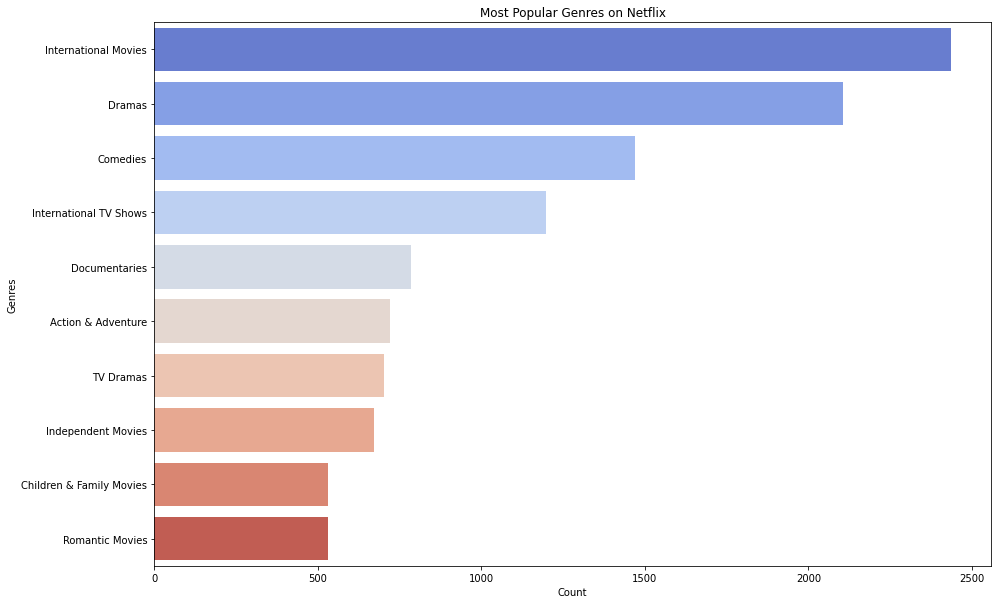

In [ ]:
# Most popular genres on netflix
track2 = {}

def genre_count(genre_str):
  genres = genre_str.split(", ")
  for genre in genres:
    if genre in track2:
      track2[genre] += 1
    else:
      track2[genre] = 1

df.loc[df['listed_in'].notnull(), 'listed_in'].apply(genre_count)

genre_c = pd.DataFrame(data=track2.values(), index=track2.keys(), columns=['Count']).reset_index()
top_genres = genre_c.sort_values('Count', ascending=False).head(10)

plt.figure(figsize=(15,10))
sns.barplot(y='index', x= 'Count', data=top_genres, palette='coolwarm')
plt.ylabel('Genres')
plt.title('Most Popular Genres on Netflix')

This bar chart displays the most popular genres that are featured on Netflix for both movies and TV shows. An interesting observation is that the genres international movies and international TV shows are both in the top 5, showing the popularity of international content. 